In [1]:
# 필요 라이브러리 import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [7]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score

def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    # ROC-AUC 추가 
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    # ROC-AUC print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
    F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))


In [8]:
# 인자로 사이킷런의 Estimator객체와, 학습/테스트 데이터 세트를 입력 받아서 학습/예측/평가 수행.
def get_model_train_eval(model, ftr_train=None, ftr_test=None, tgt_train=None, tgt_test=None, eval_set=None):
    model.fit(ftr_train, tgt_train, eval_set=eval_set)
    pred = model.predict(ftr_test)
    pred_proba = model.predict_proba(ftr_test)[:, 1]
    get_clf_eval(tgt_test, pred, pred_proba)


In [9]:
# 데이터 로딩
card_df=pd.read_csv('./creditcard.csv')
card_df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [10]:
from sklearn.preprocessing import PowerTransformer

# Time feature drop
card_df_mod=card_df.drop('Time', axis=1)

# v28 feature drop
card_df_mod=card_df_mod.drop('V28', axis=1)

# Amount log 씌우고 Amount_Scaled에 저장 후 Amount 드롭
# amount_n = np.log1p(card_df_mod['Amount'])
# card_df_mod.insert(0, 'Amount_Scaled', amount_n)
# card_df_mod.drop(['Amount'], axis=1)

# PowerTransformer 설정
power_transformer = PowerTransformer(method='yeo-johnson', standardize=False)

# Amount 열을 변환하고 새로운 열 추가
card_df_mod['Amount_Scaled'] = power_transformer.fit_transform(card_df_mod[['Amount']])

# 원래의 Amount 열 삭제
card_df_mod=card_df_mod.drop(['Amount'], axis=1)

card_df_mod

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,Class,Amount_Scaled
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,0,4.490035
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0,1.268075
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,0,5.212956
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0,4.337344
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0,3.879280
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,...,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0,0.563719
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,...,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,0,3.023876
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,...,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,0,3.854348
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,...,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0,2.273259


In [11]:
correlation_matrix = card_df_mod.corr()

# Class와의 상관관계 확인
class_correlations = correlation_matrix['Class'].drop('Class')

# 상관관계가 높은 피처 (예: 절대값이 0.5 이상인 피처 선택)
high_correlation_features = class_correlations[abs(class_correlations) > 0.2]

high_correlation_features

V10   -0.216883
V12   -0.260593
V14   -0.302544
V17   -0.326481
Name: Class, dtype: float64

In [12]:
out_colunms = high_correlation_features.index.to_list()

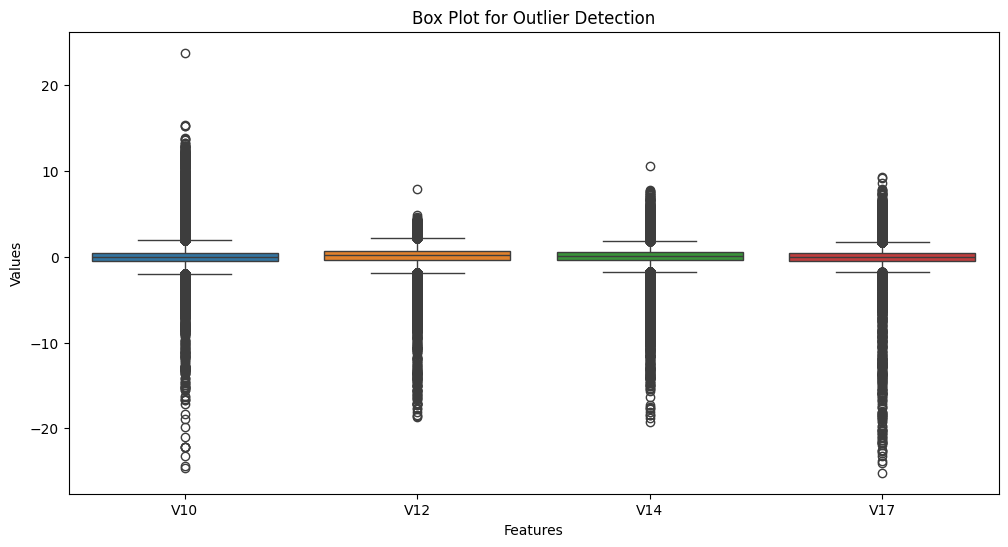

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
sns.boxplot(data=card_df_mod[out_colunms])
plt.title("Box Plot for Outlier Detection")
plt.xlabel("Features")
plt.ylabel("Values")
plt.show()

In [14]:
# 타켓과 피처들의 상관관계가  0.2 이상인것들 중에서 타겟이 1인것
card_df_out = card_df_mod[card_df_mod['Class']==1][out_colunms]

In [15]:
card_df_out

,V10,V12,V14,V17
541,-2.772272,-2.899907,-4.289254,-2.830056
623,-0.838587,-0.503141,-1.692029,0.599717
4920,-1.525412,-6.560124,-1.470102,-4.781831
6108,-4.801637,-10.912819,-6.771097,-12.598419
6329,-2.447469,-4.609628,-6.079337,6.739384
...,...,...,...,...
279863,-5.587794,-5.417424,-6.665177,-4.570529
280143,-3.232153,-3.096915,-5.210141,-3.267116
280149,-3.463891,-2.775022,-4.057162,-5.035326
281144,-5.245984,-5.030465,-6.416628,-4.614717


In [16]:
def get_outlier(df=None, column=None, weight=2.25):
    # fraud에 해당하는 column 데이터만 추출, 1/4 분위와 3/4 분위 지점을 np.percentile로 구함. 
    fraud = df[df['Class']==1][column]
    quantile_25 = np.percentile(fraud.values, 25)
    quantile_75 = np.percentile(fraud.values, 75)
    # IQR을 구하고, IQR에 1.5를 곱하여 최대값과 최소값 지점 구함. 
    iqr = quantile_75 - quantile_25
    iqr_weight = iqr * weight
    lowest_val = quantile_25 - iqr_weight
    highest_val = quantile_75 + iqr_weight
    # 최대값 보다 크거나, 최소값 보다 작은 값을 아웃라이어로 설정하고 DataFrame index 반환. 
    outlier_index = fraud[(fraud < lowest_val) | (fraud > highest_val)].index
    return outlier_index

In [17]:
out_result_list=[]
for colunm in out_colunms:
    outlier_index=get_outlier(card_df_mod, colunm)
    out_result_list.extend(outlier_index)
    type(outlier_index)

print(len(out_result_list))

9


In [18]:
unique_outlier_index = list(set(out_result_list))
print(len(unique_outlier_index))

9


In [19]:
out_row_drop_card_df = card_df_mod.drop(unique_outlier_index, axis=0)

In [20]:
out_row_drop_card_df

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,Class,Amount_Scaled
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,0,4.490035
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0,1.268075
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,0,5.212956
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0,4.337344
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0,3.879280
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,...,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0,0.563719
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,...,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,0,3.023876
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,...,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,0,3.854348
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,...,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0,2.273259


In [21]:
X_features = out_row_drop_card_df.iloc[:, :-2] # 데이터 추출
y_labels = out_row_drop_card_df.loc[:, 'Class']
print(f'데이터 구조 : {X_features.shape}')

데이터 구조 : (284798, 27)


In [22]:
print(X_features)

               V1         V2        V3        V4        V5        V6  \
0       -1.359807  -0.072781  2.536347  1.378155 -0.338321  0.462388   
1        1.191857   0.266151  0.166480  0.448154  0.060018 -0.082361   
2       -1.358354  -1.340163  1.773209  0.379780 -0.503198  1.800499   
3       -0.966272  -0.185226  1.792993 -0.863291 -0.010309  1.247203   
4       -1.158233   0.877737  1.548718  0.403034 -0.407193  0.095921   
...           ...        ...       ...       ...       ...       ...   
284802 -11.881118  10.071785 -9.834783 -2.066656 -5.364473 -2.606837   
284803  -0.732789  -0.055080  2.035030 -0.738589  0.868229  1.058415   
284804   1.919565  -0.301254 -3.249640 -0.557828  2.630515  3.031260   
284805  -0.240440   0.530483  0.702510  0.689799 -0.377961  0.623708   
284806  -0.533413  -0.189733  0.703337 -0.506271 -0.012546 -0.649617   

              V7        V8        V9       V10  ...       V18       V19  \
0       0.239599  0.098698  0.363787  0.090794  ...  0.02579

In [23]:
# 학습/테스트 데이터 분리
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
      X_features
    , y_labels
    , test_size=0.2
    , random_state=0
    , stratify=y_labels
)

In [24]:
print(X_features)

               V1         V2        V3        V4        V5        V6  \
0       -1.359807  -0.072781  2.536347  1.378155 -0.338321  0.462388   
1        1.191857   0.266151  0.166480  0.448154  0.060018 -0.082361   
2       -1.358354  -1.340163  1.773209  0.379780 -0.503198  1.800499   
3       -0.966272  -0.185226  1.792993 -0.863291 -0.010309  1.247203   
4       -1.158233   0.877737  1.548718  0.403034 -0.407193  0.095921   
...           ...        ...       ...       ...       ...       ...   
284802 -11.881118  10.071785 -9.834783 -2.066656 -5.364473 -2.606837   
284803  -0.732789  -0.055080  2.035030 -0.738589  0.868229  1.058415   
284804   1.919565  -0.301254 -3.249640 -0.557828  2.630515  3.031260   
284805  -0.240440   0.530483  0.702510  0.689799 -0.377961  0.623708   
284806  -0.533413  -0.189733  0.703337 -0.506271 -0.012546 -0.649617   

              V7        V8        V9       V10  ...       V18       V19  \
0       0.239599  0.098698  0.363787  0.090794  ...  0.02579

In [25]:
# 데이터 오버 샘플링
from imblearn.over_sampling import ADASYN

adasyn = ADASYN(random_state=0)
X_train_over, y_train_over = adasyn.fit_resample(X_train, y_train)
print('SMOTE 적용 전 학습용 피처/레이블 데이터 세트: ', X_train.shape, y_train.shape)
print('SMOTE 적용 후 학습용 피처/레이블 데이터 세트: ', X_train_over.shape, y_train_over.shape)
print('SMOTE 적용 후 레이블 값 분포: \n', pd.Series(y_train_over).value_counts())

SMOTE 적용 전 학습용 피처/레이블 데이터 세트:  (227838, 27) (227838,)
SMOTE 적용 후 학습용 피처/레이블 데이터 세트:  (454893, 27) (454893,)
SMOTE 적용 후 레이블 값 분포: 
 Class
0    227452
1    227441
Name: count, dtype: int64


In [26]:
# 조기 종료 => 검증 데이터 분리
X_tr, X_val, y_tr, y_val = train_test_split(
      X_train_over
    , y_train_over
    , test_size=0.2
    , random_state=0
    , stratify=y_train_over
)

In [27]:
# 학습, 평가 : AUC score
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score

In [28]:
# 모델 생성
xgb_clf = XGBClassifier(
      n_estimators=500
    , max_depth=5
    , learning_rate=0.01
    , early_stopping_rounds=50
    , eval_metric='auc'
    , random_state=156
)

In [483]:
# lightgbm 모델 생성
from lightgbm import LGBMClassifier

lgbm_clf = LGBMClassifier(
      n_estimators=1000
    , num_leaves=64
    , n_jobs=-1
    , early_stopping_rounds=100
    , boost_from_average=False
    )

In [502]:
get_model_train_eval(
      xgb_clf
    , ftr_train=X_tr
    , ftr_test=X_test
    , tgt_train=y_tr
    , tgt_test=y_test
    , eval_set=[(X_val, y_val)]
)

[0]	validation_0-auc:0.95236
[1]	validation_0-auc:0.96268
[2]	validation_0-auc:0.96199
[3]	validation_0-auc:0.96659
[4]	validation_0-auc:0.96709
[5]	validation_0-auc:0.96703
[6]	validation_0-auc:0.96776
[7]	validation_0-auc:0.96955
[8]	validation_0-auc:0.96984
[9]	validation_0-auc:0.97021
[10]	validation_0-auc:0.97113
[11]	validation_0-auc:0.97113
[12]	validation_0-auc:0.97121
[13]	validation_0-auc:0.97123
[14]	validation_0-auc:0.97114
[15]	validation_0-auc:0.97125
[16]	validation_0-auc:0.97066
[17]	validation_0-auc:0.97252
[18]	validation_0-auc:0.97264
[19]	validation_0-auc:0.97266
[20]	validation_0-auc:0.97277
[21]	validation_0-auc:0.97282
[22]	validation_0-auc:0.97363
[23]	validation_0-auc:0.97518
[24]	validation_0-auc:0.97528
[25]	validation_0-auc:0.97518
[26]	validation_0-auc:0.97542
[27]	validation_0-auc:0.97539
[28]	validation_0-auc:0.97808
[29]	validation_0-auc:0.97864
[30]	validation_0-auc:0.97853
[31]	validation_0-auc:0.97895
[32]	validation_0-auc:0.97941
[33]	validation_0-au

In [29]:
# hyperopt, KFold 사용한 튜닝
from hyperopt import hp

# max_depth는 1에서 10까지 2간격으로, min_child_weight는 1에서 6까지 1간격으로
# colsample_bytree는 0.5에서 0.95사이, learning_rate는 0.01에서 0.1사이 정규 분포된 값으로 검색. 

xgb_search_space = {'max_depth': hp.quniform('max_depth', 6, 14, 2), 
                    'min_child_weight': hp.quniform('min_child_weight', 1, 6, 1),
                    'colsample_bytree': hp.uniform('colsample_bytree', 0.5, 0.95),
                    'learning_rate': hp.uniform('learning_rate', 0.07, 0.13)
}

In [30]:
# 데이터 구조 변경
X_train_over_df = pd.DataFrame(X_train_over)
y_train_over_sr = pd.Series(y_train_over)

In [35]:
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score

# 목적 함수 설정. 
# 추후 fmin()에서 입력된 search_space값으로 XGBClassifier 교차 검증 학습 후 -1* roc_auc 평균 값을 반환.  
def objective_func(search_space):
    xgb_clf = XGBClassifier(n_estimators=100, max_depth=int(search_space['max_depth']),
                            min_child_weight=int(search_space['min_child_weight']),
                            colsample_bytree=search_space['colsample_bytree'],
                            learning_rate=search_space['learning_rate'],
                            early_stopping_rounds=30,
                            eval_metric='auc'
                           )
    # 2개 k-fold 방식으로 평가된 roc_auc 지표를 담는 list
    roc_auc_list= []
    
    # 2개 k-fold방식 적용 
    kf = KFold(n_splits=2)
    # X_train_over_df을 다시 학습과 검증용 데이터로 분리
    for tr_index, val_index in kf.split(X_train_over_df):
        # kf.split(X_train_over_df)으로 추출된 학습과 검증 index값으로 학습과 검증 데이터 세트 분리 
        X_tr, y_tr = X_train_over_df.iloc[tr_index], y_train_over_sr.iloc[tr_index]
        X_val, y_val = X_train_over_df.iloc[val_index], y_train_over_sr.iloc[val_index]
        # early stopping은 30회로 설정하고 추출된 학습과 검증 데이터로 XGBClassifier 학습 수행. 
        xgb_clf.fit(X_tr, y_tr,
                   eval_set=[(X_tr, y_tr), (X_val, y_val)])
    
        # 1로 예측한 확률값 추출후 roc auc 계산하고 평균 roc auc 계산을 위해 list에 결과값 담음. 
        score = roc_auc_score(y_val, xgb_clf.predict_proba(X_val)[:, 1])
        roc_auc_list.append(score)
        
    # 3개 k-fold로 계산된 roc_auc값의 평균값을 반환하되, 
    # HyperOpt는 목적함수의 최소값을 위한 입력값을 찾으므로 -1을 곱한 뒤 반환. 
    return -1 * np.mean(roc_auc_list)

In [36]:
from hyperopt import fmin, tpe, Trials

trials = Trials()

# fmin()함수를 호출. max_evals지정된 횟수만큼 반복 후 목적함수의 최소값을 가지는 최적 입력값 추출. 
best = fmin(fn=objective_func, space=xgb_search_space, algo=tpe.suggest,
            max_evals=50, # 최대 반복 횟수를 지정합니다.
            trials=trials, rstate=np.random.default_rng(seed=156))

print('best:', best)

[0]	validation_0-auc:0.90760	validation_1-auc:0.91336 
[1]	validation_0-auc:0.91486	validation_1-auc:0.91636 
[2]	validation_0-auc:0.91622	validation_1-auc:0.91797 
[3]	validation_0-auc:0.91645	validation_1-auc:0.91797 
[4]	validation_0-auc:0.97037	validation_1-auc:0.97723 
[5]	validation_0-auc:0.98793	validation_1-auc:0.98556 
[6]	validation_0-auc:0.98882	validation_1-auc:0.98632 
[7]	validation_0-auc:0.98925	validation_1-auc:0.98592 
[8]	validation_0-auc:0.99260	validation_1-auc:0.98699 
[9]	validation_0-auc:0.99272	validation_1-auc:0.98805 
[10]	validation_0-auc:0.99753	validation_1-auc:0.99033
[11]	validation_0-auc:0.99780	validation_1-auc:0.99115
[12]	validation_0-auc:0.99886	validation_1-auc:0.99197
[13]	validation_0-auc:0.99892	validation_1-auc:0.99192
[14]	validation_0-auc:0.99892	validation_1-auc:0.99208
[15]	validation_0-auc:0.99892	validation_1-auc:0.99219
[16]	validation_0-auc:0.99870	validation_1-auc:0.99214
[17]	validation_0-auc:0.99893	validation_1-auc:0.99224
[18]	valid

Exception ignored in: 
<function DMatrix.__del__ at 0x0000018CD8CA5630>
Traceback (most recent call last):

  File "c:\ProgramData\anaconda3\envs\ml-dev\lib\site-packages\xgboost\core.py", line 932, in __del__

_check_call(_LIB.XGDMatrixFree(self.handle))
KeyboardInterrupt
: 


[0]	validation_0-auc:0.90736	validation_1-auc:0.91233                             
[1]	validation_0-auc:0.90738	validation_1-auc:0.91406                             
[2]	validation_0-auc:0.91311	validation_1-auc:0.91490                             
[3]	validation_0-auc:0.92375	validation_1-auc:0.92588                             
[4]	validation_0-auc:0.98781	validation_1-auc:0.98388                             
[5]	validation_0-auc:0.98799	validation_1-auc:0.98403                             
[6]	validation_0-auc:0.98855	validation_1-auc:0.98448                             
[7]	validation_0-auc:0.98943	validation_1-auc:0.98523                             
[8]	validation_0-auc:0.98951	validation_1-auc:0.98615                             
[9]	validation_0-auc:0.99143	validation_1-auc:0.98746                             
[10]	validation_0-auc:0.99483	validation_1-auc:0.98293                            
[11]	validation_0-auc:0.99493	validation_1-auc:0.98390                            
[12]

In [ ]:
xgb_clf =  XGBClassifier(n_estimators=500,
                        max_depth=int(best['max_depth']),
                        min_child_weight=int(best['min_child_weight']), 
                        colsample_bytree=best['colsample_bytree'],
                        learning_rate=best['learning_rate'],
                        early_stopping_rounds=100, 
                        eval_metric="auc"
                        )


In [38]:

get_model_train_eval(
      xgb_clf
    , ftr_train=X_tr
    , ftr_test=X_test
    , tgt_train=y_tr
    , tgt_test=y_test
    , eval_set=[(X_val, y_val)]
)


[0]	validation_0-auc:0.99500
[1]	validation_0-auc:0.99801
[2]	validation_0-auc:0.99874
[3]	validation_0-auc:0.99889
[4]	validation_0-auc:0.99930
[5]	validation_0-auc:0.99940
[6]	validation_0-auc:0.99941
[7]	validation_0-auc:0.99966
[8]	validation_0-auc:0.99969
[9]	validation_0-auc:0.99974
[10]	validation_0-auc:0.99975
[11]	validation_0-auc:0.99975
[12]	validation_0-auc:0.99977
[13]	validation_0-auc:0.99979
[14]	validation_0-auc:0.99979
[15]	validation_0-auc:0.99982
[16]	validation_0-auc:0.99984
[17]	validation_0-auc:0.99984
[18]	validation_0-auc:0.99984
[19]	validation_0-auc:0.99985
[20]	validation_0-auc:0.99985
[21]	validation_0-auc:0.99986
[22]	validation_0-auc:0.99991
[23]	validation_0-auc:0.99991
[24]	validation_0-auc:0.99991
[25]	validation_0-auc:0.99993
[26]	validation_0-auc:0.99993
[27]	validation_0-auc:0.99994
[28]	validation_0-auc:0.99994
[29]	validation_0-auc:0.99993
[30]	validation_0-auc:0.99994
[31]	validation_0-auc:0.99995
[32]	validation_0-auc:0.99994
[33]	validation_0-au

In [ ]:
# 웨이트 2.25 xgb
# 오차 행렬
# [[55025  1838]
#  [    4    93]]
# 정확도: 0.9677, 정밀도: 0.0482, 재현율: 0.9588,    F1: 0.0917, AUC:0.9907

In [ ]:
# 테스트 데이터로 점수 뽑기
xgb_roc_score = roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:,1])
print('ROC AUC: {0:.4f}'.format(xgb_roc_score))